<a href="https://colab.research.google.com/github/Abhishek3102/Premier-League-Season-Analysis/blob/main/Premier_League_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [2]:
!kaggle kernels pull pcharambira/premier-league-analysis

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [3]:
!kaggle datasets download -d pcharambira/premier-league-analysis

403 - Forbidden - Permission 'datasets.get' was denied


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
results = pd.read_csv("/content/results.csv")
stats = pd.read_csv("/content/stats.csv")

In [6]:
results.head()

,home_team,away_team,home_goals,away_goals,result,season
0,Sheffield United,Liverpool,1.0,1.0,D,2006-2007
1,Arsenal,Aston Villa,1.0,1.0,D,2006-2007
2,Everton,Watford,2.0,1.0,H,2006-2007
3,Newcastle United,Wigan Athletic,2.0,1.0,H,2006-2007
4,Portsmouth,Blackburn Rovers,3.0,0.0,H,2006-2007


In [7]:
stats.head()

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season
0,Manchester United,28.0,5.0,83.0,60.0,1.0,698.0,256.0,21.0,12.0,...,918.0,258.0,25686.0,NaN,1.0,NaN,2.0,37.0,25.0,2006-2007
1,Chelsea,24.0,3.0,64.0,62.0,4.0,636.0,216.0,14.0,16.0,...,897.0,231.0,24010.0,NaN,2.0,NaN,1.0,74.0,22.0,2006-2007
2,Liverpool,20.0,10.0,57.0,44.0,0.0,668.0,214.0,15.0,8.0,...,1107.0,282.0,24150.0,NaN,1.0,NaN,0.0,51.0,27.0,2006-2007
3,Arsenal,19.0,8.0,63.0,59.0,3.0,638.0,226.0,19.0,10.0,...,873.0,278.0,25592.0,NaN,1.0,NaN,0.0,88.0,27.0,2006-2007
4,Tottenham Hotspur,17.0,12.0,57.0,48.0,3.0,520.0,184.0,6.0,5.0,...,796.0,181.0,22200.0,NaN,2.0,NaN,0.0,51.0,24.0,2006-2007


In [8]:
stats_copy = stats.copy()
stats_copy.set_index('team',inplace=True)
season=stats_copy.groupby(['season']).wins.nlargest(1)
season=pd.DataFrame(season)
season.reset_index(drop=False,inplace=True)
season.sort_index(ascending=True)

,season,team,wins
0,2006-2007,Manchester United,28.0
1,2007-2008,Manchester United,27.0
2,2008-2009,Manchester United,28.0
3,2009-2010,Chelsea,27.0
4,2010-2011,Manchester United,23.0
5,2011-2012,Manchester City,28.0
6,2012-2013,Manchester United,28.0
7,2013-2014,Manchester City,27.0
8,2014-2015,Chelsea,26.0
9,2015-2016,Leicester City,23.0


**How many wins are required to win the trophy based on past performance of teams?**

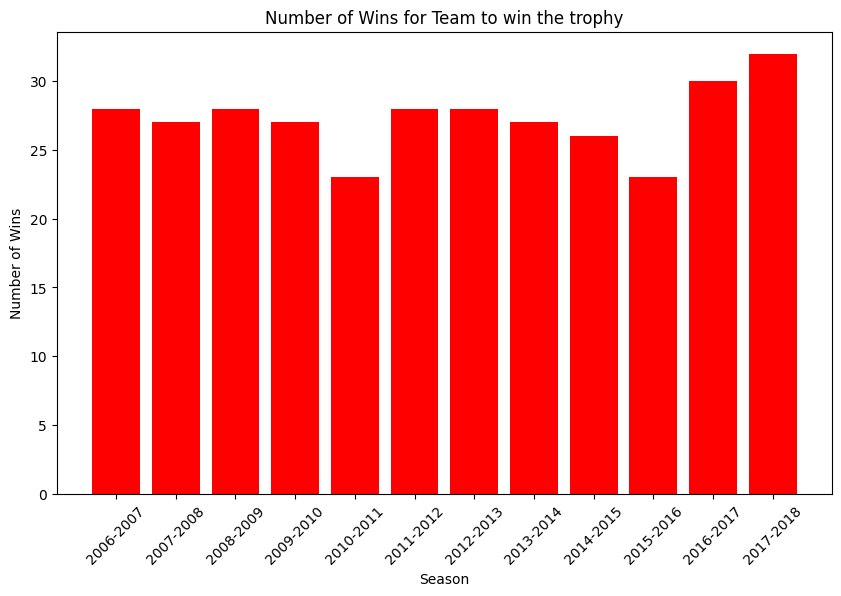

In [9]:
plt.figure(figsize=(10, 6))
plt.bar(season['season'], season['wins'], color='red')
plt.xlabel('Season')
plt.ylabel('Number of Wins')
plt.title('Number of Wins for Team to win the trophy')
plt.xticks(rotation=45)
plt.show()

**How many PL trophies have each team won between the period 2006-07 to 2017-18?**

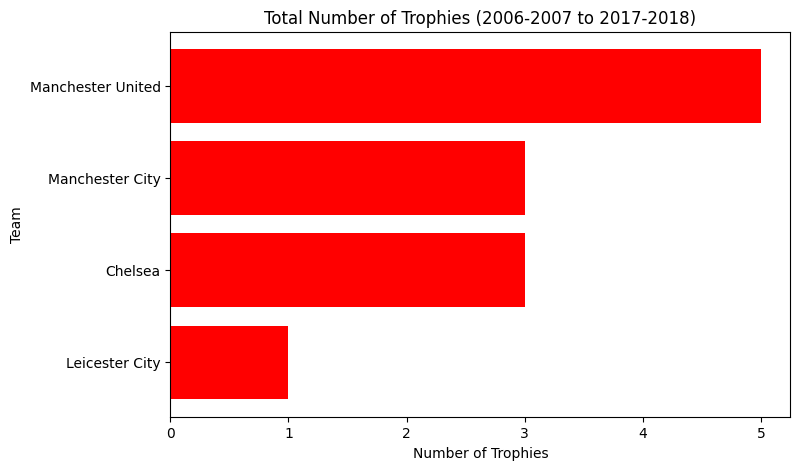

In [10]:
trophies_count = season['team'].value_counts()

trophies_count = trophies_count.sort_values(ascending=True)

plt.figure(figsize=(8, 5))
plt.barh(trophies_count.index, trophies_count.values, color='red')
plt.xlabel("Number of Trophies")
plt.ylabel("Team")
plt.title("Total Number of Trophies (2006-2007 to 2017-2018)")
plt.show()

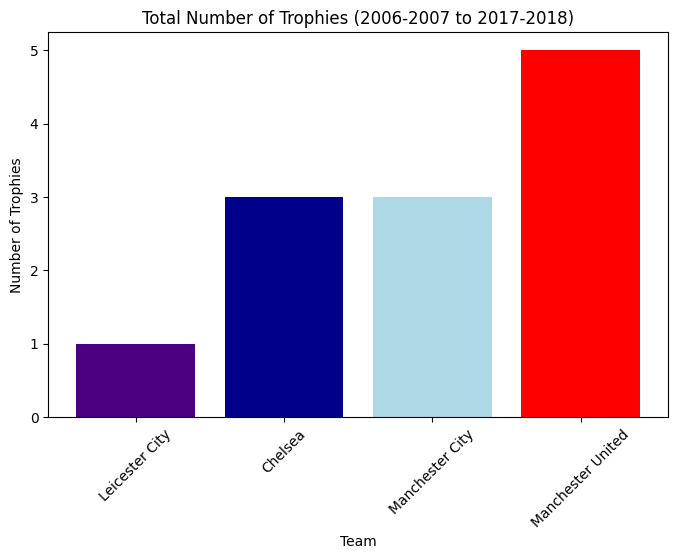

In [11]:
trophies_count = season['team'].value_counts()

trophies_count = trophies_count.sort_values(ascending=True)

team_colors = {'Manchester United': 'red',
              'Manchester City': 'lightblue',
              'Chelsea': 'darkblue',
              'Leicester City': 'indigo'}

plt.figure(figsize=(8, 5))
plt.bar(trophies_count.index, trophies_count.values, color=[team_colors.get(team, 'gray') for team in trophies_count.index])
plt.ylabel("Number of Trophies")
plt.xlabel("Team")
plt.title("Total Number of Trophies (2006-2007 to 2017-2018)")
plt.xticks(rotation=45)
plt.show()


In [12]:
stats.query('wins > 25')

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season
0,Manchester United,28.0,5.0,83.0,60.0,1.0,698.0,256.0,21.0,12.0,...,918.0,258.0,25686.0,NaN,1.0,NaN,2.0,37.0,25.0,2006-2007
20,Manchester United,27.0,5.0,80.0,51.0,2.0,696.0,260.0,16.0,12.0,...,936.0,261.0,26620.0,NaN,10.0,627.0,0.0,47.0,23.0,2007-2008
40,Manchester United,28.0,4.0,68.0,61.0,5.0,715.0,230.0,9.0,7.0,...,1039.0,257.0,30077.0,NaN,3.0,579.0,0.0,56.0,22.0,2008-2009
60,Chelsea,27.0,6.0,103.0,54.0,5.0,834.0,288.0,13.0,16.0,...,1083.0,286.0,28914.0,NaN,3.0,503.0,1.0,87.0,30.0,2009-2010
61,Manchester United,27.0,7.0,86.0,49.0,4.0,695.0,221.0,12.0,14.0,...,1156.0,297.0,28968.0,NaN,2.0,622.0,0.0,65.0,18.0,2009-2010
100,Manchester City,28.0,5.0,93.0,51.0,5.0,738.0,250.0,21.0,10.0,...,843.0,269.0,28620.0,65.0,6.0,480.0,1.0,39.0,21.0,2011-2012
101,Manchester United,28.0,5.0,89.0,51.0,1.0,646.0,243.0,17.0,16.0,...,1018.0,279.0,28113.0,64.0,3.0,521.0,1.0,37.0,26.0,2011-2012
120,Manchester United,28.0,5.0,86.0,57.0,1.0,561.0,213.0,24.0,14.0,...,962.0,218.0,27264.0,65.0,5.0,506.0,0.0,38.0,28.0,2012-2013
140,Manchester City,27.0,6.0,102.0,72.0,1.0,673.0,238.0,19.0,10.0,...,892.0,283.0,28341.0,59.0,0.0,411.0,0.0,64.0,31.0,2013-2014
141,Liverpool,26.0,6.0,101.0,54.0,1.0,651.0,258.0,27.0,14.0,...,643.0,224.0,28172.0,64.0,5.0,427.0,1.0,36.0,29.0,2013-2014


In [13]:
stats.iloc[0:20]

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season
0,Manchester United,28.0,5.0,83.0,60.0,1.0,698.0,256.0,21.0,12.0,...,918.0,258.0,25686.0,NaN,1.0,NaN,2.0,37.0,25.0,2006-2007
1,Chelsea,24.0,3.0,64.0,62.0,4.0,636.0,216.0,14.0,16.0,...,897.0,231.0,24010.0,NaN,2.0,NaN,1.0,74.0,22.0,2006-2007
2,Liverpool,20.0,10.0,57.0,44.0,0.0,668.0,214.0,15.0,8.0,...,1107.0,282.0,24150.0,NaN,1.0,NaN,0.0,51.0,27.0,2006-2007
3,Arsenal,19.0,8.0,63.0,59.0,3.0,638.0,226.0,19.0,10.0,...,873.0,278.0,25592.0,NaN,1.0,NaN,0.0,88.0,27.0,2006-2007
4,Tottenham Hotspur,17.0,12.0,57.0,48.0,3.0,520.0,184.0,6.0,5.0,...,796.0,181.0,22200.0,NaN,2.0,NaN,0.0,51.0,24.0,2006-2007
5,Bolton Wanderers,16.0,14.0,47.0,84.0,4.0,404.0,120.0,7.0,10.0,...,942.0,217.0,18932.0,NaN,6.0,NaN,2.0,44.0,21.0,2006-2007
6,Reading,16.0,15.0,52.0,38.0,3.0,419.0,132.0,8.0,15.0,...,1067.0,280.0,18017.0,NaN,2.0,NaN,0.0,63.0,21.0,2006-2007
7,Blackburn Rovers,15.0,16.0,52.0,77.0,6.0,478.0,155.0,5.0,12.0,...,911.0,205.0,20812.0,NaN,8.0,NaN,5.0,56.0,25.0,2006-2007
8,Everton,15.0,10.0,52.0,65.0,2.0,465.0,153.0,9.0,9.0,...,867.0,208.0,19250.0,NaN,2.0,NaN,1.0,83.0,15.0,2006-2007
9,Portsmouth,14.0,12.0,45.0,48.0,1.0,525.0,186.0,9.0,13.0,...,783.0,247.0,19377.0,NaN,4.0,NaN,2.0,79.0,30.0,2006-2007


In [14]:
stats.iloc[0:20]

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season
0,Manchester United,28.0,5.0,83.0,60.0,1.0,698.0,256.0,21.0,12.0,...,918.0,258.0,25686.0,NaN,1.0,NaN,2.0,37.0,25.0,2006-2007
1,Chelsea,24.0,3.0,64.0,62.0,4.0,636.0,216.0,14.0,16.0,...,897.0,231.0,24010.0,NaN,2.0,NaN,1.0,74.0,22.0,2006-2007
2,Liverpool,20.0,10.0,57.0,44.0,0.0,668.0,214.0,15.0,8.0,...,1107.0,282.0,24150.0,NaN,1.0,NaN,0.0,51.0,27.0,2006-2007
3,Arsenal,19.0,8.0,63.0,59.0,3.0,638.0,226.0,19.0,10.0,...,873.0,278.0,25592.0,NaN,1.0,NaN,0.0,88.0,27.0,2006-2007
4,Tottenham Hotspur,17.0,12.0,57.0,48.0,3.0,520.0,184.0,6.0,5.0,...,796.0,181.0,22200.0,NaN,2.0,NaN,0.0,51.0,24.0,2006-2007
5,Bolton Wanderers,16.0,14.0,47.0,84.0,4.0,404.0,120.0,7.0,10.0,...,942.0,217.0,18932.0,NaN,6.0,NaN,2.0,44.0,21.0,2006-2007
6,Reading,16.0,15.0,52.0,38.0,3.0,419.0,132.0,8.0,15.0,...,1067.0,280.0,18017.0,NaN,2.0,NaN,0.0,63.0,21.0,2006-2007
7,Blackburn Rovers,15.0,16.0,52.0,77.0,6.0,478.0,155.0,5.0,12.0,...,911.0,205.0,20812.0,NaN,8.0,NaN,5.0,56.0,25.0,2006-2007
8,Everton,15.0,10.0,52.0,65.0,2.0,465.0,153.0,9.0,9.0,...,867.0,208.0,19250.0,NaN,2.0,NaN,1.0,83.0,15.0,2006-2007
9,Portsmouth,14.0,12.0,45.0,48.0,1.0,525.0,186.0,9.0,13.0,...,783.0,247.0,19377.0,NaN,4.0,NaN,2.0,79.0,30.0,2006-2007


**How many teams played between 2006 and 2018. All teams have a single occurence and they are sorted alphabetically**

In [15]:
teams = stats['team'].unique()
teams_sorted_alphabetically = np.sort(teams)
print(teams_sorted_alphabetically)

['AFC Bournemouth' 'Arsenal' 'Aston Villa' 'Birmingham City'
 'Blackburn Rovers' 'Blackpool' 'Bolton Wanderers'
 'Brighton and Hove Albion' 'Burnley' 'Cardiff City' 'Charlton Athletic'
 'Chelsea' 'Crystal Palace' 'Derby County' 'Everton' 'Fulham'
 'Huddersfield Town' 'Hull City' 'Leicester City' 'Liverpool'
 'Manchester City' 'Manchester United' 'Middlesbrough' 'Newcastle United'
 'Norwich City' 'Portsmouth' 'Queens Park Rangers' 'Reading'
 'Sheffield United' 'Southampton' 'Stoke City' 'Sunderland' 'Swansea City'
 'Tottenham Hotspur' 'Watford' 'West Bromwich Albion' 'West Ham United'
 'Wigan Athletic' 'Wolverhampton Wanderers']


## **2007-08 season**

In [16]:
results = results[results.season == '2007-2008']
stats = stats[stats.season == '2007-2008']

In [17]:
results.head()

,home_team,away_team,home_goals,away_goals,result,season
380,Sunderland,Tottenham Hotspur,1.0,0.0,H,2007-2008
381,Bolton Wanderers,Newcastle United,1.0,3.0,A,2007-2008
382,Derby County,Portsmouth,2.0,2.0,D,2007-2008
383,Everton,Wigan Athletic,2.0,1.0,H,2007-2008
384,Middlesbrough,Blackburn Rovers,1.0,2.0,A,2007-2008


In [18]:
stats.head()

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season
20,Manchester United,27.0,5.0,80.0,51.0,2.0,696.0,260.0,16.0,12.0,...,936.0,261.0,26620.0,NaN,10.0,627.0,0.0,47.0,23.0,2007-2008
21,Chelsea,25.0,3.0,65.0,63.0,5.0,605.0,199.0,12.0,10.0,...,945.0,253.0,26290.0,NaN,8.0,687.0,0.0,62.0,19.0,2007-2008
22,Arsenal,24.0,3.0,74.0,55.0,3.0,627.0,208.0,13.0,14.0,...,888.0,234.0,28156.0,NaN,2.0,776.0,1.0,45.0,26.0,2007-2008
23,Liverpool,21.0,4.0,67.0,45.0,1.0,686.0,214.0,13.0,7.0,...,932.0,237.0,25857.0,NaN,4.0,613.0,1.0,42.0,22.0,2007-2008
24,Everton,19.0,11.0,55.0,40.0,3.0,474.0,169.0,4.0,13.0,...,877.0,198.0,21360.0,NaN,8.0,620.0,0.0,55.0,20.0,2007-2008


# **Which teams played in the PL in the 2007-08 season?**

In [19]:
teams_2007 = stats['team'].unique()
teams_2007_sorted_alphabetically = np.sort(teams_2007)
print(teams_2007_sorted_alphabetically)

['Arsenal' 'Aston Villa' 'Birmingham City' 'Blackburn Rovers'
 'Bolton Wanderers' 'Chelsea' 'Derby County' 'Everton' 'Fulham'
 'Liverpool' 'Manchester City' 'Manchester United' 'Middlesbrough'
 'Newcastle United' 'Portsmouth' 'Reading' 'Sunderland'
 'Tottenham Hotspur' 'West Ham United' 'Wigan Athletic']


In [20]:
stats.columns

Index(['team', 'wins', 'losses', 'goals', 'total_yel_card', 'total_red_card',
       'total_scoring_att', 'ontarget_scoring_att', 'hit_woodwork',
       'att_hd_goal', 'att_pen_goal', 'att_freekick_goal', 'att_ibox_goal',
       'att_obox_goal', 'goal_fastbreak', 'total_offside', 'clean_sheet',
       'goals_conceded', 'saves', 'outfielder_block', 'interception',
       'total_tackle', 'last_man_tackle', 'total_clearance', 'head_clearance',
       'own_goals', 'penalty_conceded', 'pen_goals_conceded', 'total_pass',
       'total_through_ball', 'total_long_balls', 'backward_pass',
       'total_cross', 'corner_taken', 'touches', 'big_chance_missed',
       'clearance_off_line', 'dispossessed', 'penalty_save',
       'total_high_claim', 'punches', 'season'],
      dtype='object')

In [21]:
results.columns

Index(['home_team', 'away_team', 'home_goals', 'away_goals', 'result',
       'season'],
      dtype='object')

In [22]:
team_with_max_own_goals = stats['team'][stats['own_goals'] == stats['own_goals'].max()]
print(team_with_max_own_goals)

33    Middlesbrough
Name: team, dtype: object


In [23]:
team_with_max_red_cards = stats['team'][stats['total_red_card'] == stats['total_red_card'].max()]
print(team_with_max_red_cards)

27    Blackburn Rovers
38              Fulham
Name: team, dtype: object


In [24]:
team_with_min_goals_conceded = stats['team'][stats['goals_conceded'] == stats['goals_conceded'].min()]
print(team_with_min_goals_conceded)

20    Manchester United
Name: team, dtype: object


In [25]:
team_with_max_goals_conceded = stats['team'][stats['goals_conceded'] == stats['goals_conceded'].max()]
print(team_with_max_goals_conceded)

39    Derby County
Name: team, dtype: object


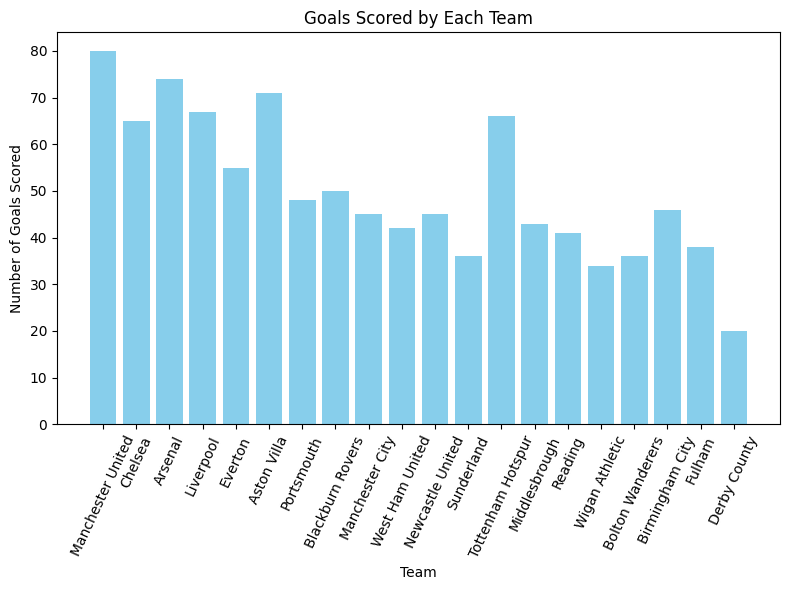

In [26]:
plt.figure(figsize=(8, 6))
plt.bar(stats['team'], stats['goals'], color='skyblue')
plt.xlabel("Team")
plt.ylabel("Number of Goals Scored")
plt.title("Goals Scored by Each Team")
plt.xticks(rotation=65)
plt.tight_layout()
plt.show()

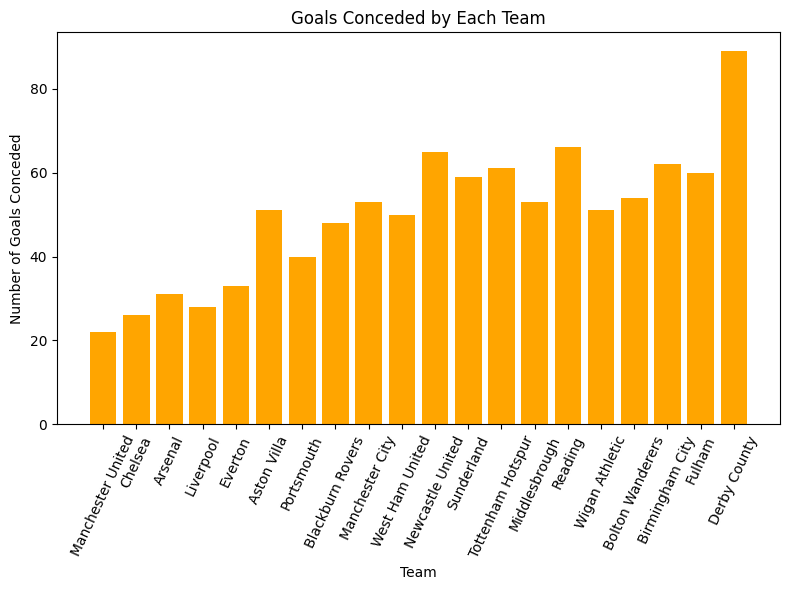

In [27]:
plt.figure(figsize=(8, 6))
plt.bar(stats['team'], stats['goals_conceded'], color='orange')
plt.xlabel("Team")
plt.ylabel("Number of Goals Conceded")
plt.title("Goals Conceded by Each Team")
plt.xticks(rotation=65)
plt.tight_layout()
plt.show()

In [28]:
stats=stats.drop(columns=['backward_pass','big_chance_missed'])

In [29]:
TEAMS = list(stats['team'])
x = np.arange(len(TEAMS))

In [30]:
stats['draws'] = 38-(stats.wins + stats.losses)
stats.head()

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,total_cross,corner_taken,touches,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season,draws
20,Manchester United,27.0,5.0,80.0,51.0,2.0,696.0,260.0,16.0,12.0,...,936.0,261.0,26620.0,10.0,627.0,0.0,47.0,23.0,2007-2008,6.0
21,Chelsea,25.0,3.0,65.0,63.0,5.0,605.0,199.0,12.0,10.0,...,945.0,253.0,26290.0,8.0,687.0,0.0,62.0,19.0,2007-2008,10.0
22,Arsenal,24.0,3.0,74.0,55.0,3.0,627.0,208.0,13.0,14.0,...,888.0,234.0,28156.0,2.0,776.0,1.0,45.0,26.0,2007-2008,11.0
23,Liverpool,21.0,4.0,67.0,45.0,1.0,686.0,214.0,13.0,7.0,...,932.0,237.0,25857.0,4.0,613.0,1.0,42.0,22.0,2007-2008,13.0
24,Everton,19.0,11.0,55.0,40.0,3.0,474.0,169.0,4.0,13.0,...,877.0,198.0,21360.0,8.0,620.0,0.0,55.0,20.0,2007-2008,8.0


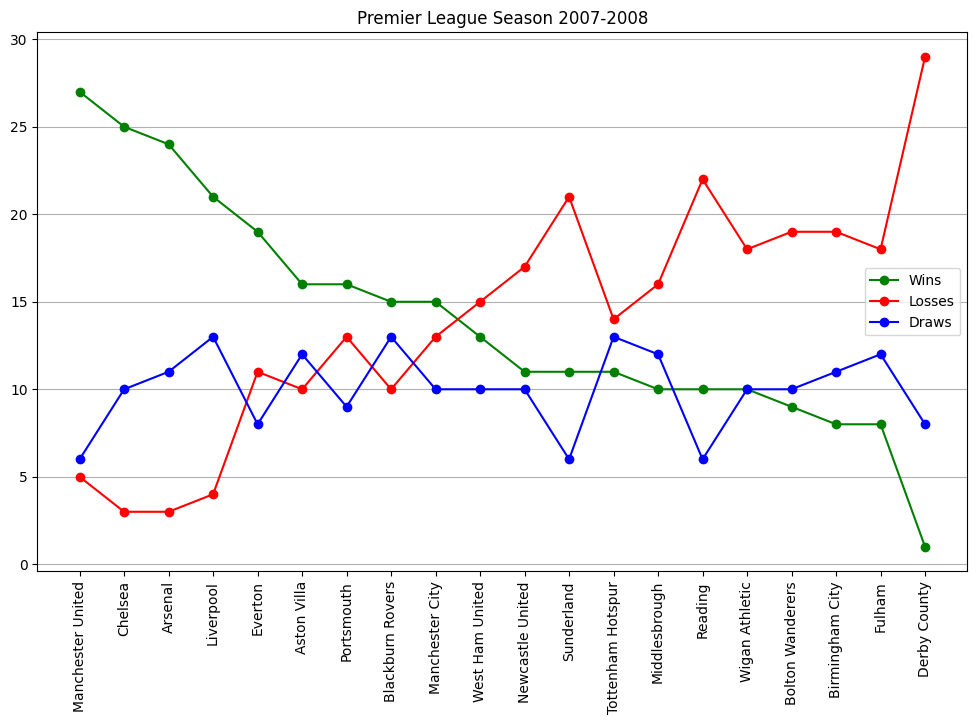

In [31]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(x, stats['wins'], '-o', color='green', label='Wins')
ax.plot(x, stats['losses'], '-o', color='red', label='Losses')
ax.plot(x, stats['draws'], '-o', color='blue', label='Draws')
ax.set_xticks(x)
ax.set_xticklabels(TEAMS)
plt.xticks(rotation=90)
ax.set_title('Premier League Season 2007-2008')
ax.legend()
plt.grid(axis='y')
plt.show()

### **Which teams show a tendency for aggressive play and potential disciplinary issues based on the highest incidence of severe fouls resulting in yellow and red cards?**

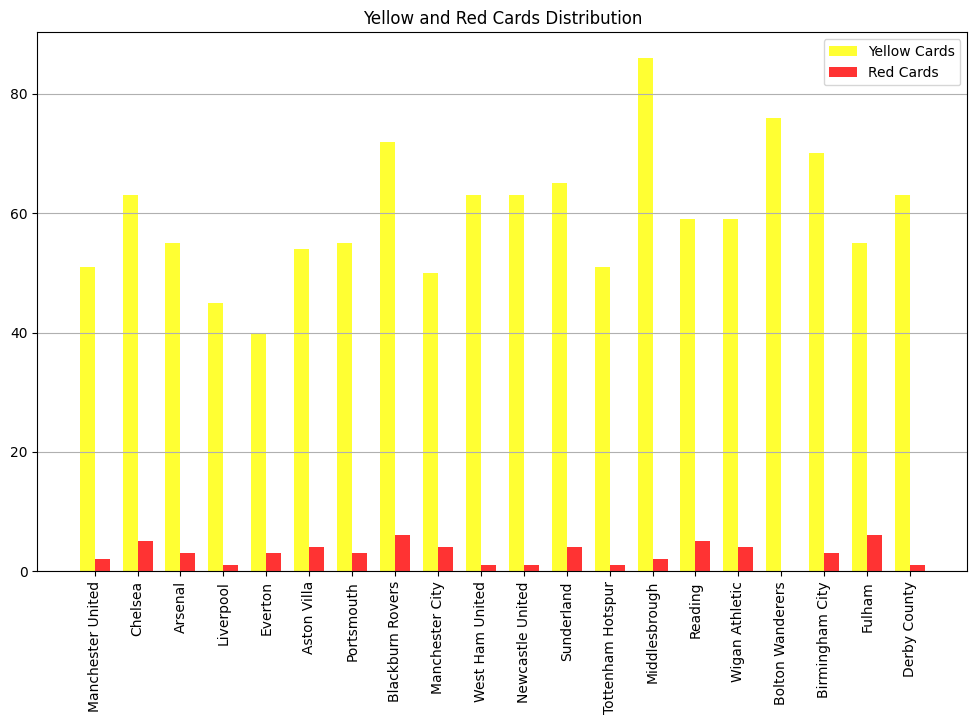

In [32]:
fig, ax = plt.subplots(figsize=(12, 7))
bar_width = 0.35
opacity = 0.8
ax.bar(x, stats['total_yel_card'], bar_width, alpha=opacity, color='yellow', label='Yellow Cards')
ax.bar(x + bar_width, stats['total_red_card'], bar_width, alpha=opacity, color='red', label='Red Cards')
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(TEAMS)
plt.xticks(rotation=90)
ax.set_title('Yellow and Red Cards Distribution')
ax.legend()
plt.grid(axis='y')
plt.show()

In [33]:
man_utd = stats[stats.team =='Manchester United']

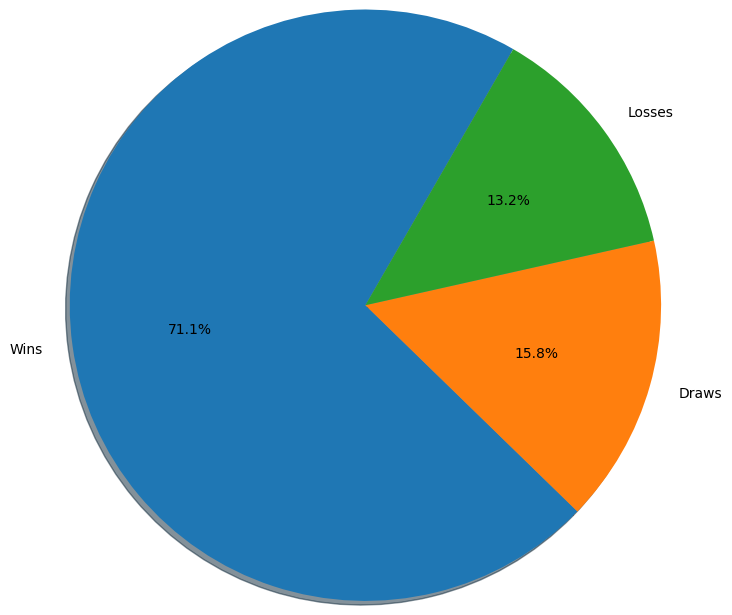

In [34]:
pie_label = ['Wins', 'Draws', 'Losses']
data = [man_utd.wins.values[0],man_utd.draws.values[0],man_utd.losses.values[0]]
plt.pie(data, labels = pie_label,autopct='%1.1f%%', shadow=True, startangle=60, radius=2)
plt.show()

In [35]:
results_man_utd = results[(results.home_team == 'Manchester United')|(results.away_team=='Manchester United')]

In [36]:
x = np.arange(len(results_man_utd))

## **Analysing how the attackers and defenders have fared throughout the season**

In [37]:
goals, conceded = [], []
for i,row in results_man_utd.iterrows():
    if row.home_team == 'Manchester United':
        goals.append(row.home_goals)
        conceded.append(row.away_goals)
    else:
        goals.append(row.away_goals)
        conceded.append(row.home_goals)

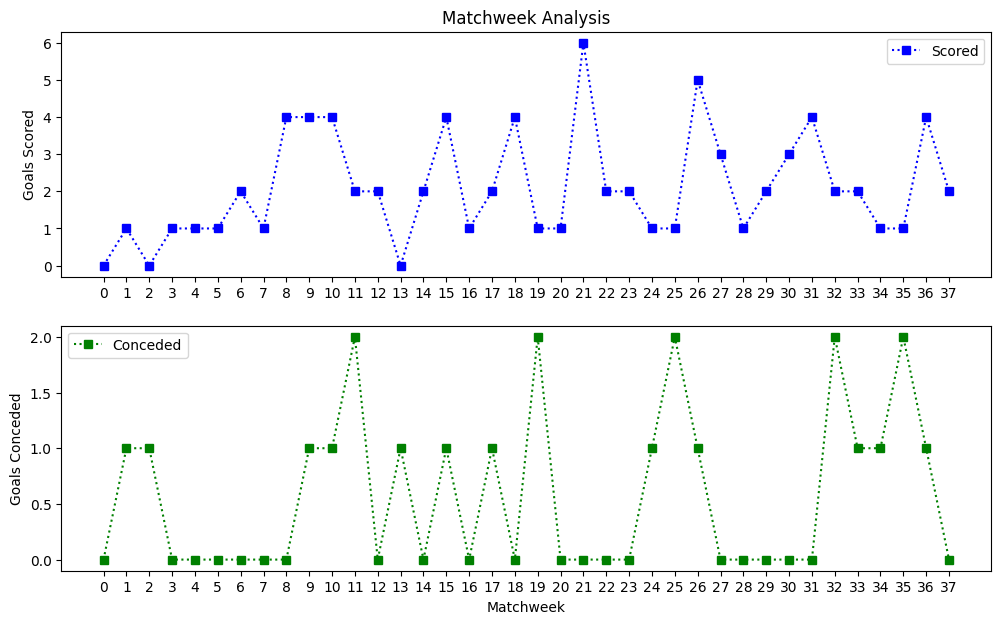

In [38]:
fig,ax = plt.subplots(2,1,figsize=(12,7))
ax[0].plot(x,goals,':s',color='blue', label='Scored')
ax[0].set_xticks(x)
ax[0].set_ylabel('Goals Scored')
ax[0].legend()
ax[0].set_title('Matchweek Analysis')
ax[1].plot(x,conceded,':s',color='green',label='Conceded')
ax[1].set_xticks(x)
ax[1].set_ylabel('Goals Conceded')
ax[1].set_xlabel('Matchweek')
ax[1].legend()
plt.show()

### **2012-2013 Analysis of Manchester United which was the last season of the GrandMaster Sir Alex Ferguson**

In [39]:
results_2013 = pd.read_csv("/content/results.csv")
stats_2013 = pd.read_csv("/content/stats.csv")

In [40]:
results_2013.head()

,home_team,away_team,home_goals,away_goals,result,season
0,Sheffield United,Liverpool,1.0,1.0,D,2006-2007
1,Arsenal,Aston Villa,1.0,1.0,D,2006-2007
2,Everton,Watford,2.0,1.0,H,2006-2007
3,Newcastle United,Wigan Athletic,2.0,1.0,H,2006-2007
4,Portsmouth,Blackburn Rovers,3.0,0.0,H,2006-2007


In [41]:
only_2013_results = results_2013[results_2013.season == '2012-2013']
only_2013_stats = stats_2013[stats_2013.season == '2012-2013']

In [42]:
only_2013_results.head()

,home_team,away_team,home_goals,away_goals,result,season
2280,Arsenal,Sunderland,0.0,0.0,D,2012-2013
2281,Fulham,Norwich City,5.0,0.0,H,2012-2013
2282,Queens Park Rangers,Swansea City,0.0,5.0,A,2012-2013
2283,Reading,Stoke City,1.0,1.0,D,2012-2013
2284,West Bromwich Albion,Liverpool,3.0,0.0,H,2012-2013


In [43]:
only_2013_stats.head()

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season
120,Manchester United,28.0,5.0,86.0,57.0,1.0,561.0,213.0,24.0,14.0,...,962.0,218.0,27264.0,65.0,5.0,506.0,0.0,38.0,28.0,2012-2013
121,Manchester City,23.0,6.0,66.0,62.0,3.0,660.0,231.0,16.0,6.0,...,860.0,269.0,27525.0,86.0,6.0,515.0,1.0,28.0,23.0,2012-2013
122,Chelsea,22.0,7.0,75.0,51.0,3.0,626.0,212.0,7.0,16.0,...,863.0,240.0,25959.0,45.0,1.0,434.0,0.0,53.0,29.0,2012-2013
123,Arsenal,21.0,7.0,72.0,42.0,5.0,597.0,205.0,16.0,11.0,...,951.0,260.0,28862.0,50.0,5.0,411.0,1.0,31.0,20.0,2012-2013
124,Tottenham Hotspur,21.0,8.0,66.0,55.0,2.0,681.0,241.0,17.0,6.0,...,884.0,262.0,25155.0,41.0,6.0,466.0,0.0,44.0,30.0,2012-2013


In [44]:
teams_of_2013 = only_2013_stats['team'].unique()
sorted_teams_of_2013 = np.sort(teams_of_2013)
print(sorted_teams_of_2013)

['Arsenal' 'Aston Villa' 'Chelsea' 'Everton' 'Fulham' 'Liverpool'
 'Manchester City' 'Manchester United' 'Newcastle United' 'Norwich City'
 'Queens Park Rangers' 'Reading' 'Southampton' 'Stoke City' 'Sunderland'
 'Swansea City' 'Tottenham Hotspur' 'West Bromwich Albion'
 'West Ham United' 'Wigan Athletic']


In [45]:
only_2013_stats.describe()

,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,att_pen_goal,...,backward_pass,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.00000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000
mean,13.600000,13.600000,53.150000,58.950000,2.600000,528.000000,175.450000,13.15000,9.250000,3.40000,...,2474.450000,860.850000,211.750000,23979.200000,44.200000,5.800000,453.65000,0.750000,54.400000,24.800000
std,6.369334,5.452184,14.758673,10.143575,1.142481,100.314243,37.746349,5.18373,3.581752,2.18608,...,476.868566,100.458043,37.374175,2958.610549,14.912376,2.745331,46.26841,0.966546,19.421637,9.440116
min,4.000000,5.000000,30.000000,42.000000,1.000000,390.000000,114.000000,7.00000,2.000000,0.00000,...,1760.000000,676.000000,165.000000,19613.000000,25.000000,1.000000,361.00000,0.000000,28.000000,6.000000
25%,9.000000,7.750000,44.500000,53.250000,2.000000,454.500000,144.750000,9.00000,6.750000,1.75000,...,2120.000000,793.000000,178.500000,21313.750000,34.750000,3.750000,421.75000,0.000000,40.250000,19.750000
50%,11.000000,14.500000,48.000000,59.000000,3.000000,505.000000,168.500000,12.00000,9.000000,4.00000,...,2453.000000,861.500000,202.500000,24299.000000,40.500000,5.000000,451.00000,0.500000,51.500000,25.000000
75%,17.250000,17.000000,66.000000,63.750000,3.000000,604.250000,208.250000,16.25000,12.250000,4.25000,...,2777.250000,943.500000,244.250000,26285.250000,46.250000,8.000000,496.00000,1.000000,62.500000,29.250000
max,28.000000,22.000000,86.000000,78.000000,5.000000,739.000000,241.000000,24.00000,16.000000,9.00000,...,3599.000000,1014.000000,284.000000,28862.000000,86.000000,12.000000,529.00000,3.000000,101.000000,39.000000


In [46]:
only_2013_stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 120 to 139
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   team                  20 non-null     object 
 1   wins                  20 non-null     float64
 2   losses                20 non-null     float64
 3   goals                 20 non-null     float64
 4   total_yel_card        20 non-null     float64
 5   total_red_card        20 non-null     float64
 6   total_scoring_att     20 non-null     float64
 7   ontarget_scoring_att  20 non-null     float64
 8   hit_woodwork          20 non-null     float64
 9   att_hd_goal           20 non-null     float64
 10  att_pen_goal          20 non-null     float64
 11  att_freekick_goal     20 non-null     float64
 12  att_ibox_goal         20 non-null     float64
 13  att_obox_goal         20 non-null     float64
 14  goal_fastbreak        20 non-null     float64
 15  total_offside         20 no

In [48]:
only_2013_stats['draws'] = 38-(only_2013_stats.wins + only_2013_stats.losses)
only_2013_stats.head()

<ipython-input-48-1d850be3f47a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_2013_stats['draws'] = 38-(only_2013_stats.wins + only_2013_stats.losses)


,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season,draws
120,Manchester United,28.0,5.0,86.0,57.0,1.0,561.0,213.0,24.0,14.0,...,218.0,27264.0,65.0,5.0,506.0,0.0,38.0,28.0,2012-2013,5.0
121,Manchester City,23.0,6.0,66.0,62.0,3.0,660.0,231.0,16.0,6.0,...,269.0,27525.0,86.0,6.0,515.0,1.0,28.0,23.0,2012-2013,9.0
122,Chelsea,22.0,7.0,75.0,51.0,3.0,626.0,212.0,7.0,16.0,...,240.0,25959.0,45.0,1.0,434.0,0.0,53.0,29.0,2012-2013,9.0
123,Arsenal,21.0,7.0,72.0,42.0,5.0,597.0,205.0,16.0,11.0,...,260.0,28862.0,50.0,5.0,411.0,1.0,31.0,20.0,2012-2013,10.0
124,Tottenham Hotspur,21.0,8.0,66.0,55.0,2.0,681.0,241.0,17.0,6.0,...,262.0,25155.0,41.0,6.0,466.0,0.0,44.0,30.0,2012-2013,9.0


In [49]:
percent_missing = only_2013_stats.isnull().sum() * 100 / len(only_2013_stats)
missing_value_df = pd.DataFrame({'column_name': percent_missing.index, 'percent_missing': percent_missing.values})
missing_value_df

,column_name,percent_missing
0,team,0.0
1,wins,0.0
2,losses,0.0
3,goals,0.0
4,total_yel_card,0.0
5,total_red_card,0.0
6,total_scoring_att,0.0
7,ontarget_scoring_att,0.0
8,hit_woodwork,0.0
9,att_hd_goal,0.0


In [50]:
Teams_of_2013 = list(only_2013_stats['team'])
x = np.arange(len(Teams_of_2013))

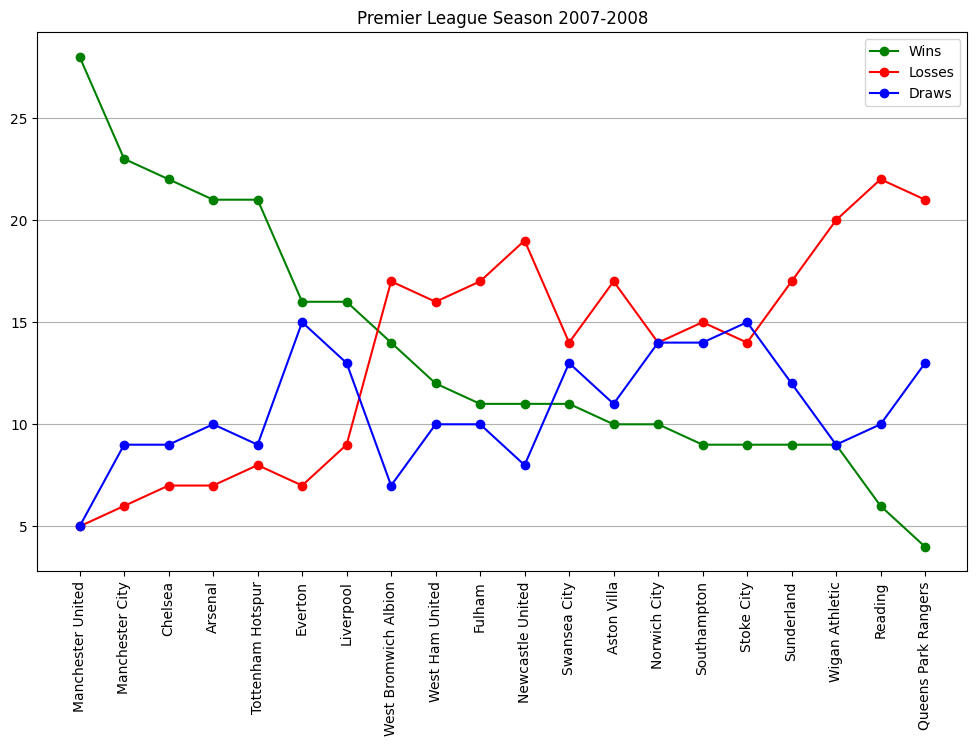

In [52]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(x, only_2013_stats['wins'], '-o', color='green', label='Wins')
ax.plot(x, only_2013_stats['losses'], '-o', color='red', label='Losses')
ax.plot(x, only_2013_stats['draws'], '-o', color='blue', label='Draws')
ax.set_xticks(x)
ax.set_xticklabels(Teams_of_2013)
plt.xticks(rotation=90)
ax.set_title('Premier League Season 2007-2008')
ax.legend()
plt.grid(axis='y')
plt.show()

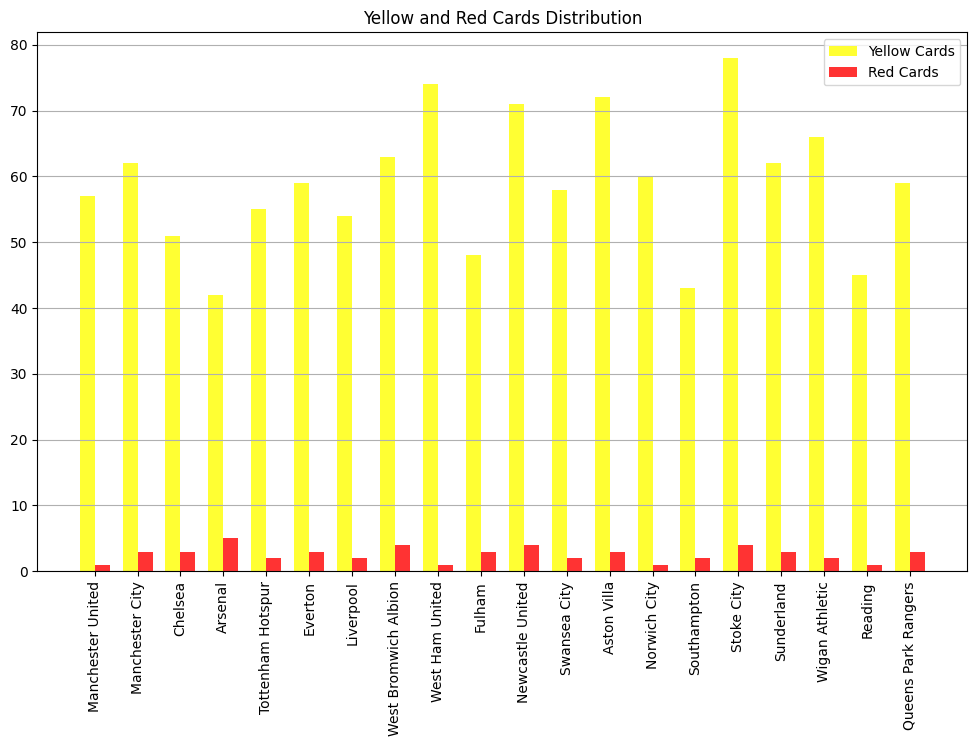

In [53]:
fig, ax = plt.subplots(figsize=(12, 7))
bar_width = 0.35
opacity = 0.8
ax.bar(x, only_2013_stats['total_yel_card'], bar_width, alpha=opacity, color='yellow', label='Yellow Cards')
ax.bar(x + bar_width, only_2013_stats['total_red_card'], bar_width, alpha=opacity, color='red', label='Red Cards')
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(Teams_of_2013)
plt.xticks(rotation=90)
ax.set_title('Yellow and Red Cards Distribution')
ax.legend()
plt.grid(axis='y')
plt.show()

Enter your favourite team's name:Stoke City


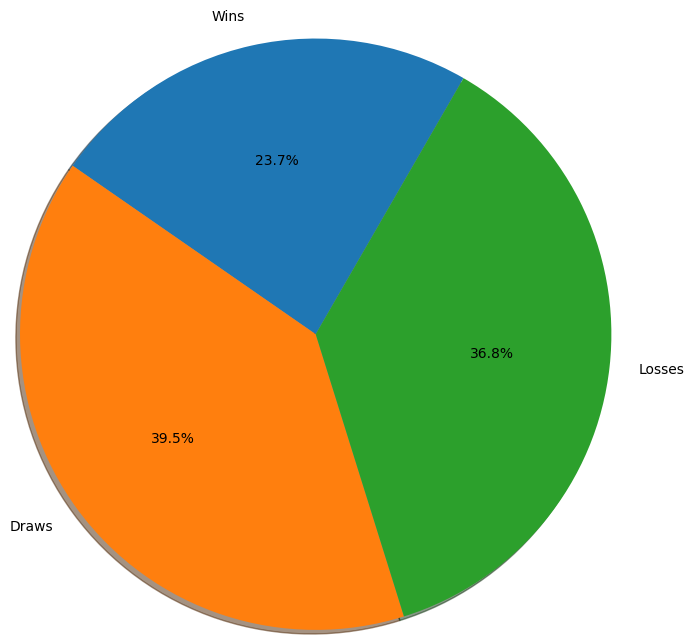

In [56]:
input_team = input("Enter your favourite team's name:")
fav_team = only_2013_stats[only_2013_stats.team == input_team]

pie_label = ['Wins', 'Draws', 'Losses']
data = [fav_team.wins.values[0],fav_team.draws.values[0],fav_team.losses.values[0]]
plt.pie(data, labels = pie_label,autopct='%1.1f%%', shadow=True, startangle=60, radius=2)
plt.show()

Enter your team name:Manchester City


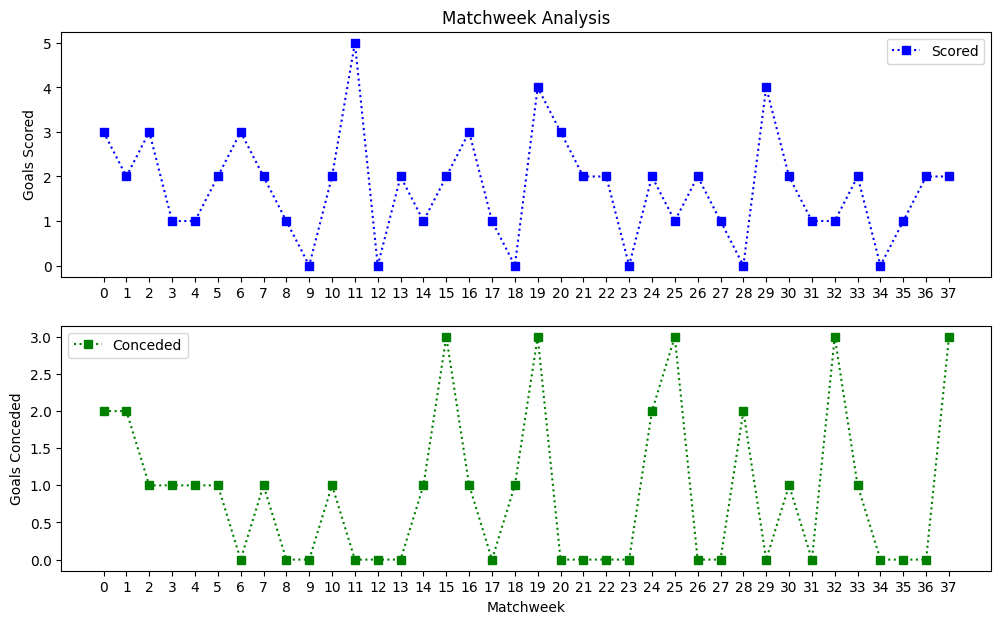

In [62]:
name_of_team = input("Enter your team name:")
results_of_fav_team = only_2013_results[(only_2013_results.home_team == name_of_team)|(only_2013_results.away_team==name_of_team)]
x = np.arange(len(results_of_fav_team))

goals, conceded = [], []
for i,row in results_of_fav_team.iterrows():
    if row.home_team == name_of_team:
        goals.append(row.home_goals)
        conceded.append(row.away_goals)
    else:
        goals.append(row.away_goals)
        conceded.append(row.home_goals)

fig,ax = plt.subplots(2,1,figsize=(12,7))
ax[0].plot(x,goals,':s',color='blue', label='Scored')
ax[0].set_xticks(x)
ax[0].set_ylabel('Goals Scored')
ax[0].legend()
ax[0].set_title('Matchweek Analysis')
ax[1].plot(x,conceded,':s',color='green',label='Conceded')
ax[1].set_xticks(x)
ax[1].set_ylabel('Goals Conceded')
ax[1].set_xlabel('Matchweek')
ax[1].legend()
plt.show()


In [64]:
results_of_any_season = pd.read_csv("/content/results.csv")
stats_of_any_season = pd.read_csv("/content/stats.csv")

Enter the season in proper format: 2016-2017


<ipython-input-73-81f175125216>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  given_season_stats['draws'] = 38-(given_season_stats.wins + given_season_stats.losses)


['AFC Bournemouth' 'Arsenal' 'Burnley' 'Chelsea' 'Crystal Palace'
 'Everton' 'Hull City' 'Leicester City' 'Liverpool' 'Manchester City'
 'Manchester United' 'Middlesbrough' 'Southampton' 'Stoke City'
 'Sunderland' 'Swansea City' 'Tottenham Hotspur' 'Watford'
 'West Bromwich Albion' 'West Ham United']
Enter your favourite team's name:Swansea City


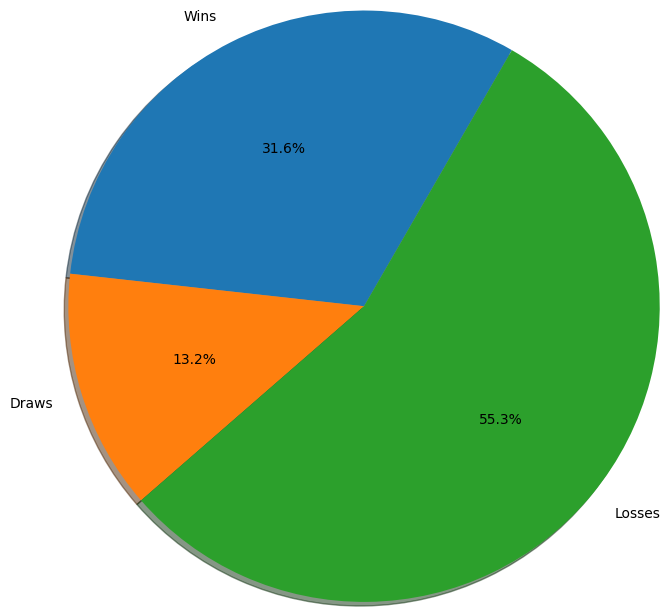

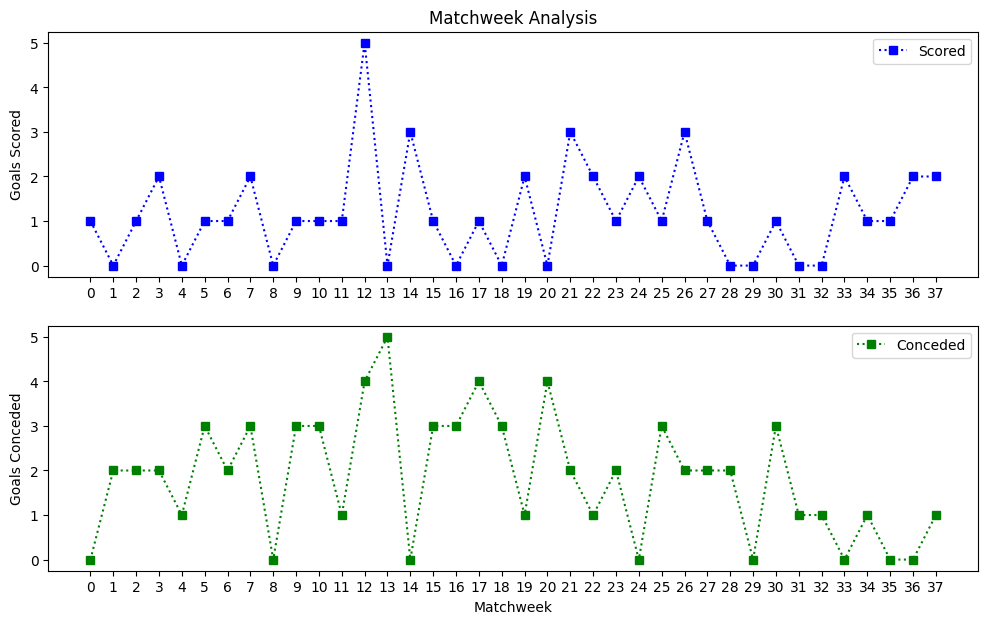

In [73]:
input_season = input("Enter the season in proper format: ")
given_season_results = results_of_any_season[results_of_any_season.season == input_season]
given_season_stats = stats_of_any_season[stats_of_any_season.season == input_season]

teams_of_given_season = given_season_stats['team'].unique()
sorted_teams_of_given_season = np.sort(teams_of_given_season)
print(sorted_teams_of_given_season)

given_season_stats['draws'] = 38-(given_season_stats.wins + given_season_stats.losses)

teams_of_given_season = list(given_season_stats['team'])
x = np.arange(len(teams_of_given_season))

input_team = input("Enter your favourite team's name:")
fav_team = given_season_stats[given_season_stats.team == input_team]

pie_label = ['Wins', 'Draws', 'Losses']
data = [fav_team.wins.values[0],fav_team.draws.values[0],fav_team.losses.values[0]]
plt.pie(data, labels = pie_label,autopct='%1.1f%%', shadow=True, startangle=60, radius=2)
plt.show()

# name_of_team = input("Enter your team name:")
results_of_fav_team = given_season_results[(given_season_results.home_team == input_team)|(given_season_results.away_team==input_team)]
x = np.arange(len(results_of_fav_team))

goals, conceded = [], []
for i,row in results_of_fav_team.iterrows():
    if row.home_team == input_team:
        goals.append(row.home_goals)
        conceded.append(row.away_goals)
    else:
        goals.append(row.away_goals)
        conceded.append(row.home_goals)

fig,ax = plt.subplots(2,1,figsize=(12,7))
ax[0].plot(x,goals,':s',color='blue', label='Scored')
ax[0].set_xticks(x)
ax[0].set_ylabel('Goals Scored')
ax[0].legend()
ax[0].set_title('Matchweek Analysis')
ax[1].plot(x,conceded,':s',color='green',label='Conceded')
ax[1].set_xticks(x)
ax[1].set_ylabel('Goals Conceded')
ax[1].set_xlabel('Matchweek')
ax[1].legend()
plt.show()
